In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_samples, silhouette_score

from jqmcvi import base
pd.set_option('display.max_columns', None)
binned_data = pd.read_csv("data/binned_time_series.csv")
display(binned_data)


,Unnamed: 0,-bands,-basos,-eos,-lymphs,-monos,-polys,24 h urine protein,ALT (SGPT),AST (SGOT),Acetaminophen,BNP,BUN,Base Deficit,Base Excess,CPK,CPK-MB,CPK-MB INDEX,CRP,CRP-hs,Carbamazepine,Carboxyhemoglobin,Device,Digoxin,ESR,Fe,Fe/TIBC Ratio,Ferritin,FiO2,Gentamicin - random,Gentamicin - trough,HCO3,HDL,Hct,Hgb,LDH,LDL,LPM O2,Lithium,MCH,MCHC,MCV,MPV,Methemoglobin,Mode,Motor,O2 Content,O2 Sat (%),Oxyhemoglobin,PEEP,PT,PT - INR,PTT,PTT ratio,Peak Airway/Pressure,Phenobarbital,Phenytoin,Pressure Control,Pressure Support,RBC,RDW,Respiratory Rate,Spontaneous Rate,T3,T3RU,T4,TIBC,TSH,TV,Tacrolimus-FK506,Temperature,Tobramycin - random,Tobramycin - trough,Total CO2,Vancomycin - random,Vancomycin - trough,Vent Rate,Vitamin B12,WBC x 1000,WBC's in body fluid,WBC's in cerebrospinal fluid,WBC's in peritoneal fluid,WBC's in pleural fluid,WBC's in urine,albumin,alkaline phos.,ammonia,amylase,anion gap,bedside glucose,bicarbonate,calcium,cd 4,chloride,cortisol,creatinine,direct bilirubin,ethanol,fibrinogen,folate,free T4,glucose,glucose - CSF,haptoglobin,hr,ionized calcium,lactate,lipase,magnesium,myoglobin,pH,paCO2,paO2,phosphate,platelets x 1000,potassium,prealbumin,prolactin,protein - CSF,protein C,protein S,resp,reticulocyte count,salicylate,sao2,serum ketones,serum osmolality,sodium,total bilirubin,total cholesterol,total protein,transferrin,triglycerides,troponin - I,troponin - T,uric acid,urinary creatinine,urinary osmolality,urinary sodium,urinary specific gravity,pat,offset_bin
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.0,NaN,NaN,42.0,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,21.9,NaN,24.7,7.8,NaN,NaN,NaN,NaN,29.2,31.6,92.5,8.9,NaN,NaN,NaN,NaN,100.0,NaN,5.0,13.7,1.2,33.0,NaN,NaN,NaN,NaN,NaN,NaN,2.67,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,23.0,23.3,NaN,16.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2.2,90.0,NaN,NaN,15.0,150.0,20.0,7.5,NaN,95.0,NaN,6.70,0.0,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,0.7,NaN,1.7,NaN,7.37,37.6,225.0,NaN,290.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,0.5,NaN,5.6,NaN,NaN,NaN,0.58,NaN,NaN,NaN,NaN,NaN,1000755,0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.0,NaN,NaN,42.0,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,21.9,NaN,24.7,7.8,NaN,NaN,NaN,NaN,29.2,31.6,92.5,8.9,NaN,NaN,NaN,NaN,100.0,NaN,5.0,13.7,1.2,33.0,NaN,NaN,NaN,NaN,NaN,NaN,2.67,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,23.0,23.3,NaN,16.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2.2,90.0,NaN,NaN,15.0,150.0,20.0,7.5,NaN,95.0,NaN,6.70,0.0,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,0.7,NaN,1.7,NaN,7.37,37.6,225.0,NaN,290.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,0.5,NaN,5.6,NaN,NaN,NaN,0.58,NaN,NaN,NaN,NaN,NaN,1000755,1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.0,NaN,NaN,42.0,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,21.9,NaN,28.1,9.0,NaN,NaN,NaN,NaN,29.6,32.0,92.4,9.2,NaN,NaN,NaN,NaN,100.0,NaN,5.0,13.7,1.2,33.0,NaN,NaN,NaN,NaN,NaN,NaN,3.04,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,23.0,23.3,NaN,16.0,NaN,10.3,NaN,NaN,NaN,NaN,NaN,2.2,90.0,NaN,NaN,17.0,169.0,18.0,7.9,NaN,93.0,NaN,7.21,0.0,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,NaN,0.7,NaN,1.7,NaN,7.37,37.6,225.0,NaN,331.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,0.5,NaN,5.6,NaN,NaN,NaN,0.68,NaN,NaN,NaN,NaN,NaN,1000755,10
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.0,NaN,NaN,42.0,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,21.9,NaN,28.1,9.0,NaN,NaN,NaN,NaN,29.6,32.0,92.4,9.2,NaN,NaN,NaN,NaN,100.0,NaN,5.0,13.7,1.2,33.0,NaN,NaN,NaN,NaN,NaN,NaN,3.04,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,23.0,23.3,NaN,16.0,NaN,10.3,NaN,NaN,NaN,NaN,NaN,2.2,90.0,NaN,NaN,17.0,169.0,18.0,7.9,NaN,93.0,NaN,7.21,0.0,NaN,NaN,NaN,NaN,170.0,NaN,NaN,NaN,NaN,0.7,NaN,1.7,NaN,7.37,37.6,225.0,NaN,331.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,0.5,NaN,5.6,NaN,NaN,NaN,0.68,NaN,NaN,NaN,NaN,NaN,1000755,11
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.0,NaN,NaN,42.0,NaN,-3

In [11]:
#drop cols with more than 110000 nans
data_no_nan = binned_data[binned_data.columns[binned_data.isnull().sum()<50000]]

#drop rows with nans, first col, and patient id/offset
final_data = data_no_nan.dropna()
final_data = final_data.drop(final_data.columns[[0, -1, -2]], axis = 1)
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(final_data)
#plot the scatterplot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
#plt.subplot(1,2,1)
plt.scatter(x = final_data.Hct, y = final_data.BUN, c = color_theme[clustering.labels_], s = 50)
plt.title('Ground Truth')

,BUN,Hct,Hgb,MCH,MCHC,MCV,RBC,RDW,WBC x 1000,anion gap,bicarbonate,calcium,chloride,creatinine,glucose,platelets x 1000,potassium,sodium
0,42.0,24.7,7.8,29.2,31.6,92.5,2.67,15.3,8.0,15.0,20.0,7.5,95.0,6.70,97.0,290.0,4.9,130.0
1,42.0,24.7,7.8,29.2,31.6,92.5,2.67,15.3,8.0,15.0,20.0,7.5,95.0,6.70,97.0,290.0,4.9,130.0
2,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
3,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
4,42.0,28.1,9.0,29.6,32.0,92.4,3.04,15.1,10.3,17.0,18.0,7.9,93.0,7.21,170.0,331.0,4.9,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126307,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126308,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126309,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0
126310,22.0,29.2,8.9,27.3,30.5,89.6,3.26,22.7,19.3,10.0,14.0,8.2,108.0,1.70,82.0,103.0,4.6,132.0


,hr,sao2,resp,Motor
24,93.000000,99.000000,15.916667,6.0
25,78.666667,98.916667,17.416667,6.0
26,80.250000,96.500000,15.250000,6.0
27,76.250000,96.250000,15.666667,6.0
28,82.833333,95.750000,20.166667,6.0
...,...,...,...,...
126283,85.500000,96.750000,24.250000,5.0
126284,85.916667,96.333333,24.500000,5.0
126285,90.083333,96.250000,24.083333,5.0
126286,96.416667,95.000000,25.666667,5.0


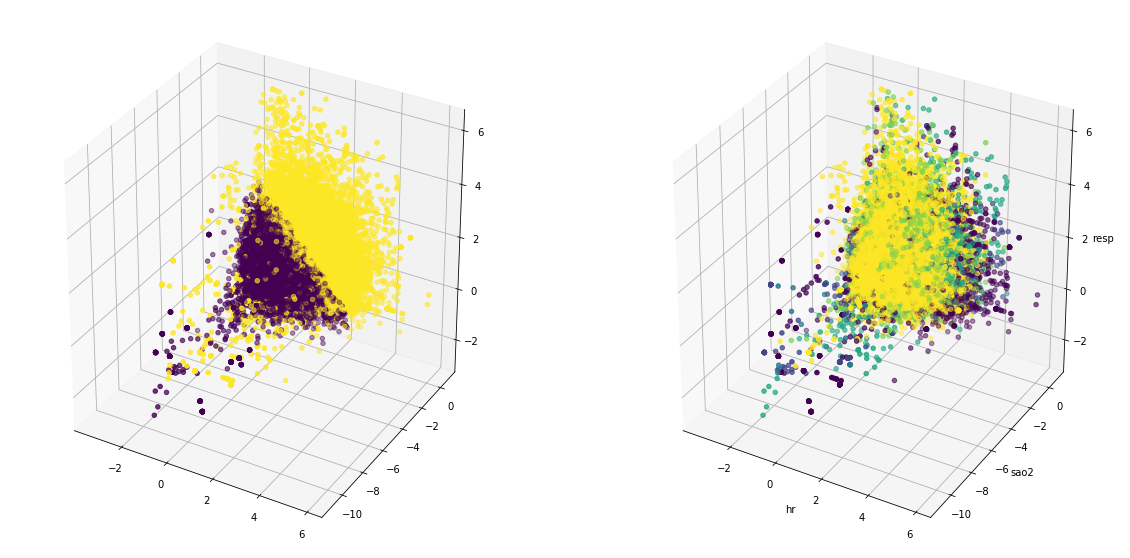

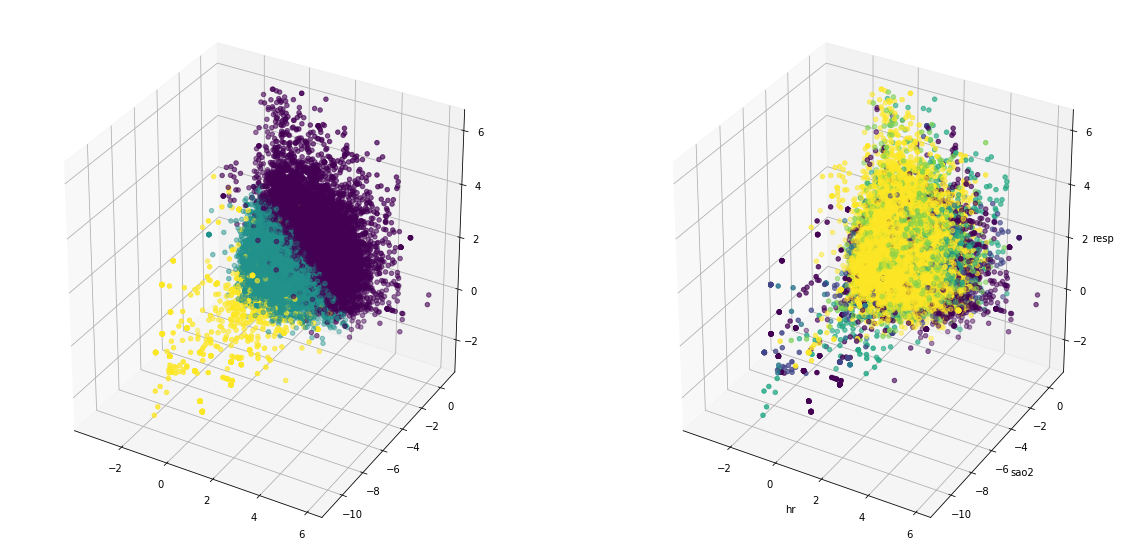

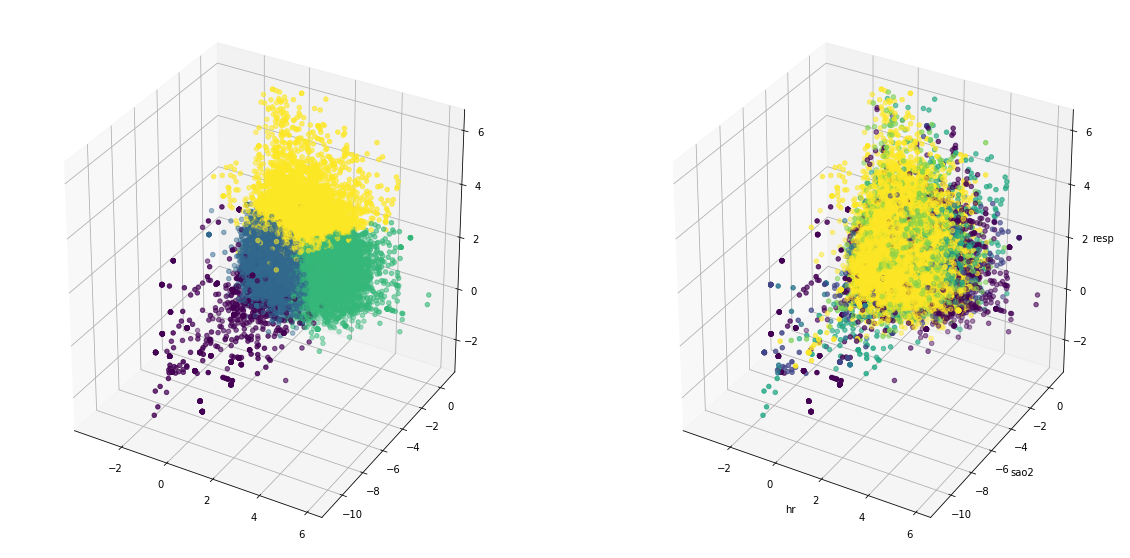

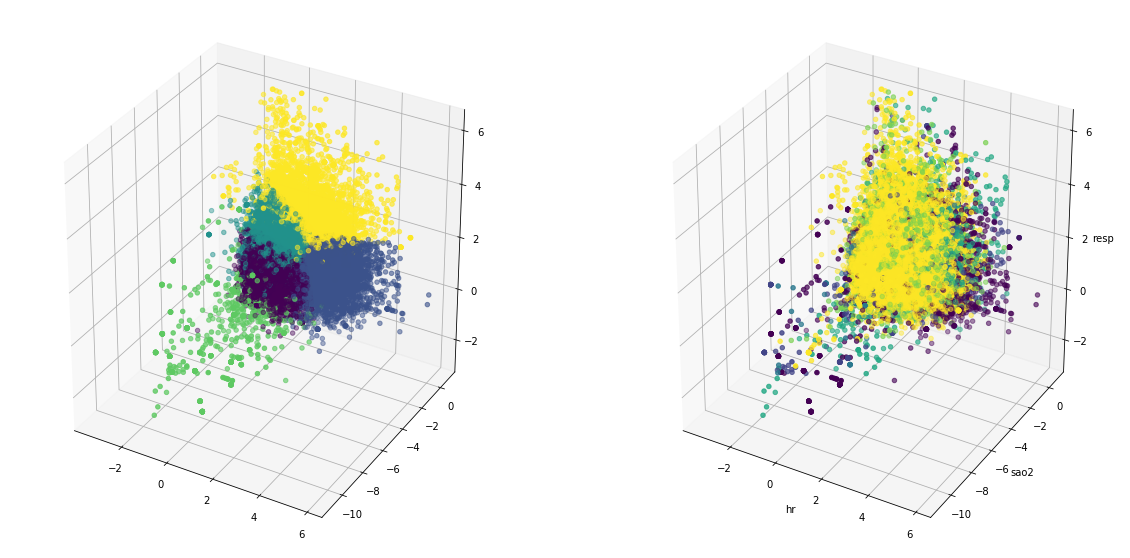

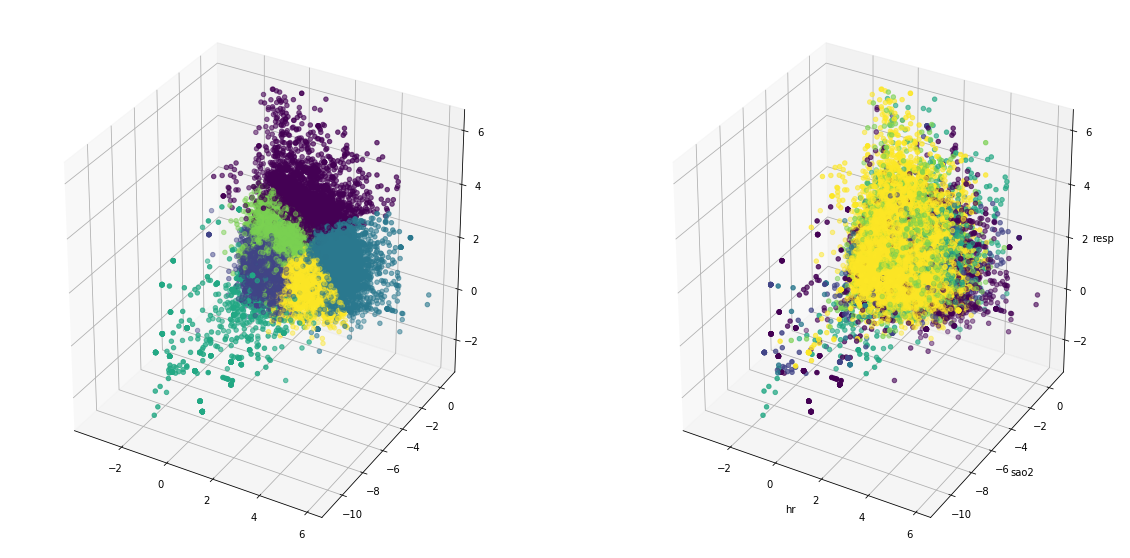

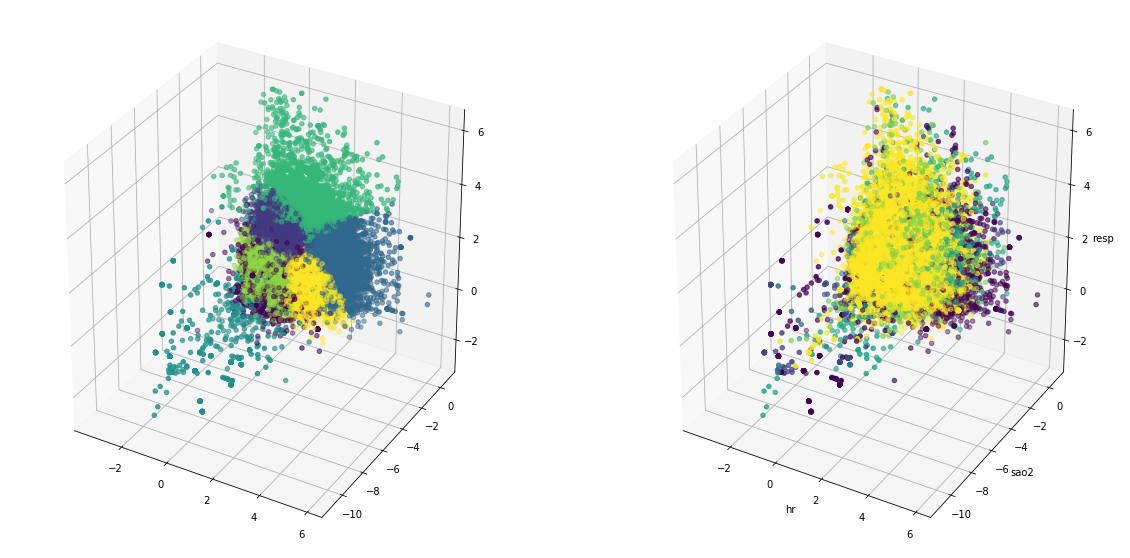

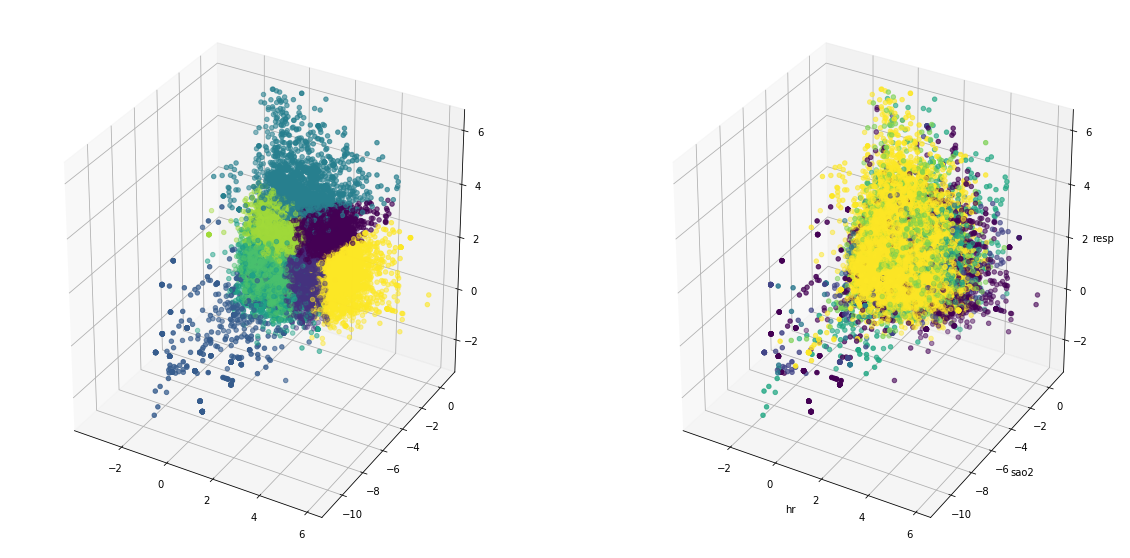

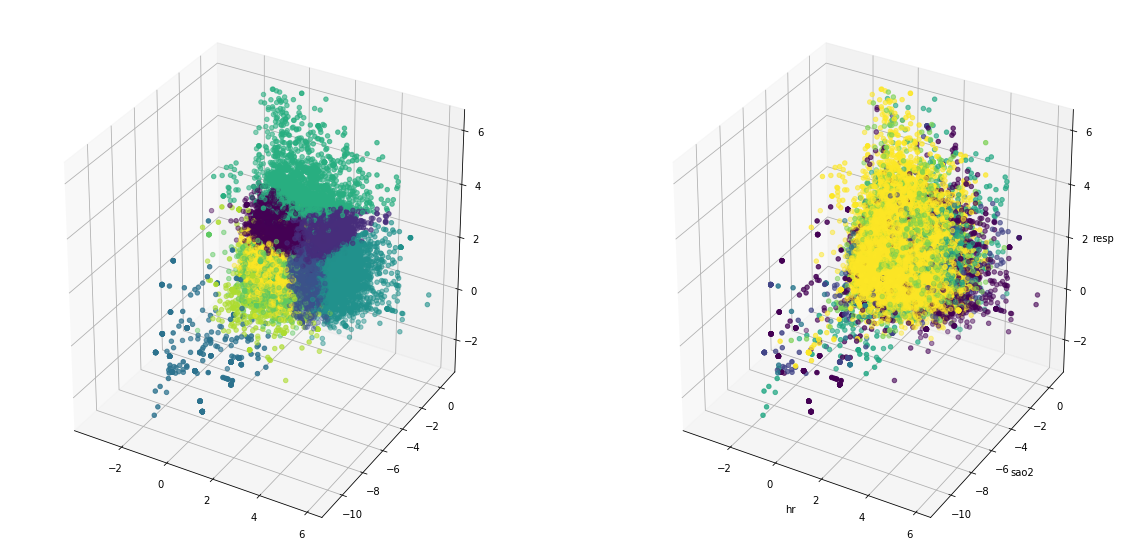

In [51]:
new_df = binned_data[['hr', 'sao2', 'resp', 'Motor']]
new_df = new_df.dropna()
display(new_df)
v = new_df.values[:, :3]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(v)
v = scaler.transform(v)

g = new_df.values[:, 3]
inertia = []
for k in range(2,10):
    clustering = KMeans(n_clusters = k)
    cluster_labels = clustering.fit_predict(v)
    
    inertia.append(clustering.inertia_)
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(v[:, 0], v[:, 1], v[:, 2], c = cluster_labels)
    
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(v[:, 0], v[:, 1], v[:, 2], c = g)
    ax.set_xlabel("hr")
    ax.set_ylabel("sao2")
    ax.set_zlabel("resp")
    


    


0
8


Text(0, 0.5, 'Silhouette Score')

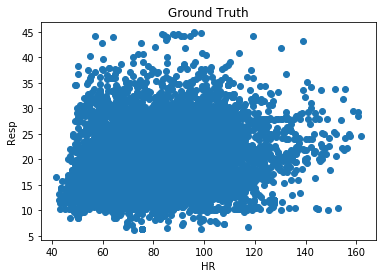

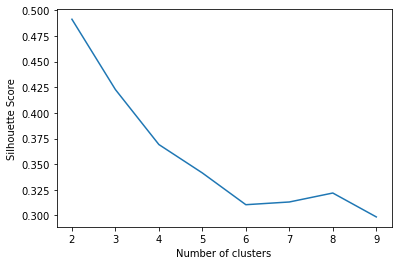

In [10]:
#plot the scatterplot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'blue', 'green', 'yellow', 'black', 'orange', 'purple'])
print(min(clustering.labels_))
print(max(clustering.labels_))
plt.scatter(x = small_df.hr, y = small_df.resp)#, c = color_theme[clustering.labels_])
plt.title('Ground Truth')
plt.xlabel("HR")
plt.ylabel("Resp")

# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("Inertia")

plt.figure()
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
